# <center><h1 style="font-family: Times New Roman; color: black;">Support Vector Machine</h1></center>

# Dataset Selection:
For this assignment, we'll utilize the widely recognized Mushroom Dataset

# Task 1: Exploratory Data Analysis (EDA)
1. Load the Mushroom dataset and perform fundamental data exploration.
2. Utilize histograms, box plots, or density plots to understand feature distributions.
3. Investigate feature correlations to discern relationships within the data.

# Task 2: Data Preprocessing
1. Encode categorical variables if necessary.
2. Split the dataset into training and testing sets.

# Task 3: Data Visualization
1. Employ scatter plots, pair plots, or relevant visualizations to comprehend feature distributions and relationships.
2. Visualize class distributions to gauge dataset balance or imbalance.

# Task 4: SVM Implementation
1. Implement a basic SVM classifier using Python libraries like scikit-learn.
2. Train the SVM model on the training data.
3. Evaluate model performance on the testing data using appropriate metrics (e.g., accuracy, precision, recall, F1-score).

# Task 5: Visualization of SVM Results
1. Visualize classification results on the testing data.

# Task 6: Parameter Tuning and Optimization
1. Experiment with different SVM hyperparameters (e.g., kernel type, regularization parameter) to optimize performance.

# Task 7: Comparison and Analysis
1. Compare SVM performance with various kernels (e.g., linear, polynomial, radial basis function).
2. Analyze SVM strengths and weaknesses for the Mushroom dataset based on EDA and visualization results.
3. Discuss practical implications of SVM in real-world classification tasks.

# Solutions:

# Task 1: Exploratory Data Analysis (EDA)

# 1.1 Load the Dataset and Display Basic Information

In [1]:
# Import necessary libraries
import pandas as pd

# Load dataset
mushroom_data = pd.read_csv('mushroom.csv')
mushroom_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2000 non-null   int64  
 1   cap_shape                 2000 non-null   object 
 2   cap_surface               2000 non-null   object 
 3   cap_color                 2000 non-null   object 
 4   bruises                   2000 non-null   object 
 5   odor                      2000 non-null   object 
 6   gill_attachment           2000 non-null   object 
 7   gill_spacing              2000 non-null   object 
 8   gill_size                 2000 non-null   object 
 9   gill_color                2000 non-null   object 
 10  stalk_shape               2000 non-null   object 
 11  stalk_root                2000 non-null   object 
 12  stalk_surface_above_ring  2000 non-null   object 
 13  stalk_surface_below_ring  2000 non-null   object 
 14  stalk_co

In [2]:
# Display the first few rows of the dataset
# This gives us a quick look at the first 5 records in the dataset
print("\nFirst few rows of the dataset:")
print(mushroom_data.head())


First few rows of the dataset:
   Unnamed: 0 cap_shape cap_surface cap_color bruises   odor gill_attachment  \
0        1167    sunken       scaly     white      no  anise      descending   
1        1037    sunken     fibrous       red      no  anise         notched   
2         309      flat     grooves    purple     yes   foul      descending   
3         282      bell       scaly      pink     yes  fishy         notched   
4         820      flat      smooth    yellow     yes  musty            free   

  gill_spacing gill_size gill_color  ...  veil_type veil_color ring_number  \
0      distant     broad       pink  ...    partial      brown         two   
1      crowded    narrow  chocolate  ...  universal      brown         two   
2      crowded     broad     purple  ...  universal     yellow         two   
3        close     broad     orange  ...    partial     yellow         two   
4      crowded    narrow     orange  ...  universal      white        none   

   ring_type spore

# 1.2  Check for Missing Values

In [3]:
# It's important to know if there are any missing values that need to be handled
print("\nMissing values in the dataset:")
print(mushroom_data.isnull().sum())


Missing values in the dataset:
Unnamed: 0                  0
cap_shape                   0
cap_surface                 0
cap_color                   0
bruises                     0
odor                        0
gill_attachment             0
gill_spacing                0
gill_size                   0
gill_color                  0
stalk_shape                 0
stalk_root                  0
stalk_surface_above_ring    0
stalk_surface_below_ring    0
stalk_color_above_ring      0
stalk_color_below_ring      0
veil_type                   0
veil_color                  0
ring_number                 0
ring_type                   0
spore_print_color           0
population                  0
habitat                     0
class                       0
stalk_height                0
cap_diameter                0
dtype: int64


# 1.3  Check for Summary Statistics

In [4]:
# Perform summary statistics
# Although this dataset is categorical, this step is useful to understand the distribution of categories
print("\nSummary statistics of the dataset:")
print(mushroom_data.describe(include='all'))


Summary statistics of the dataset:
         Unnamed: 0 cap_shape cap_surface cap_color bruises  odor  \
count   2000.000000      2000        2000      2000    2000  2000   
unique          NaN         5           4         9       2     9   
top             NaN    sunken       scaly     brown     yes  foul   
freq            NaN       439         568       263    1023   274   
mean     624.974000       NaN         NaN       NaN     NaN   NaN   
std      375.091938       NaN         NaN       NaN     NaN   NaN   
min        0.000000       NaN         NaN       NaN     NaN   NaN   
25%      290.000000       NaN         NaN       NaN     NaN   NaN   
50%      607.000000       NaN         NaN       NaN     NaN   NaN   
75%      957.250000       NaN         NaN       NaN     NaN   NaN   
max     1279.000000       NaN         NaN       NaN     NaN   NaN   

       gill_attachment gill_spacing gill_size gill_color  ...  veil_type  \
count             2000         2000      2000       2000  .

# 1.4 Visualize Feature Distributions (Histograms)

<Figure size 2000x1500 with 0 Axes>

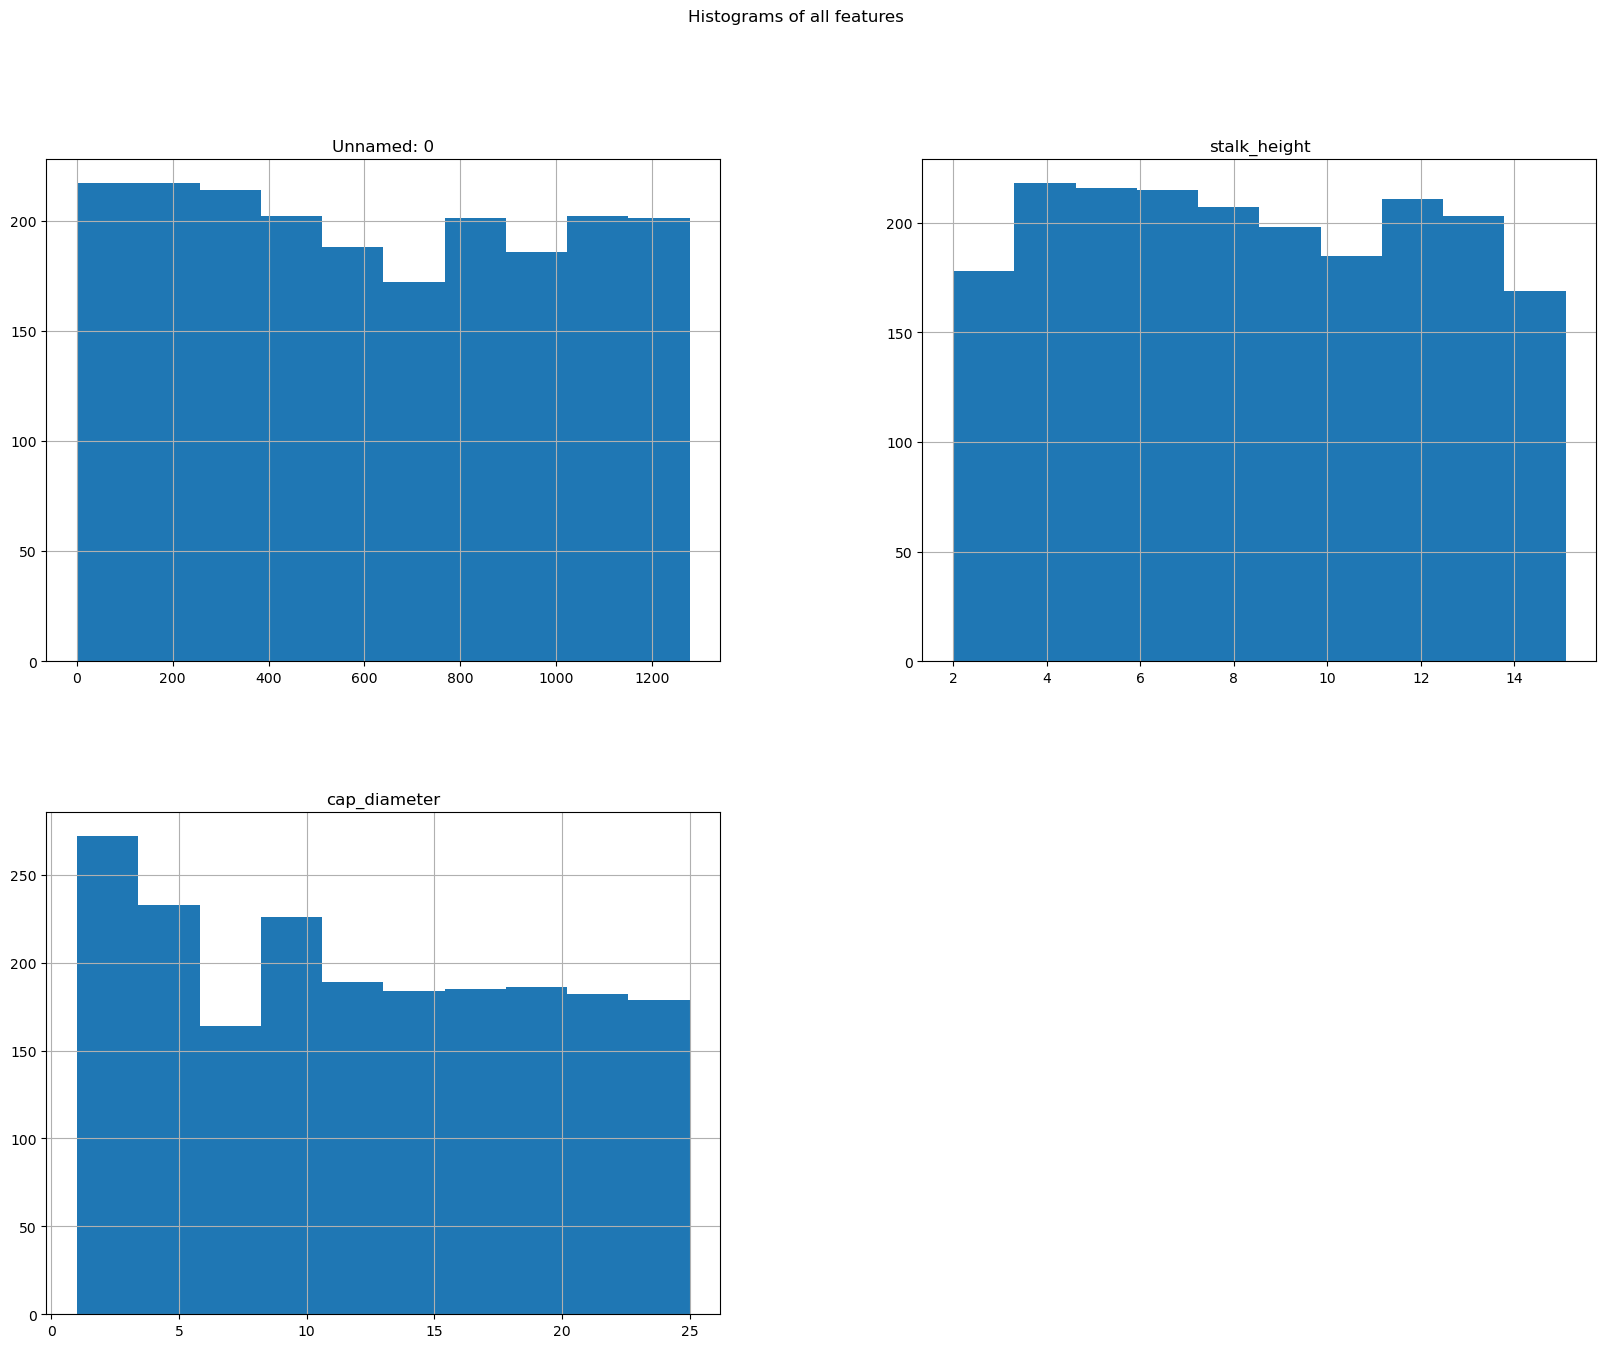

In [5]:
# Import Libraries
import matplotlib.pyplot as plt

# Plotting histograms for categorical feature distributions
# Since the dataset is categorical, we can visualize each feature's distribution
plt.figure(figsize=(20, 15))
mushroom_data.hist(figsize=(20, 15), bins=10)
plt.suptitle("Histograms of all features")
plt.show()

# 1.5 Investigate Feature Correlations

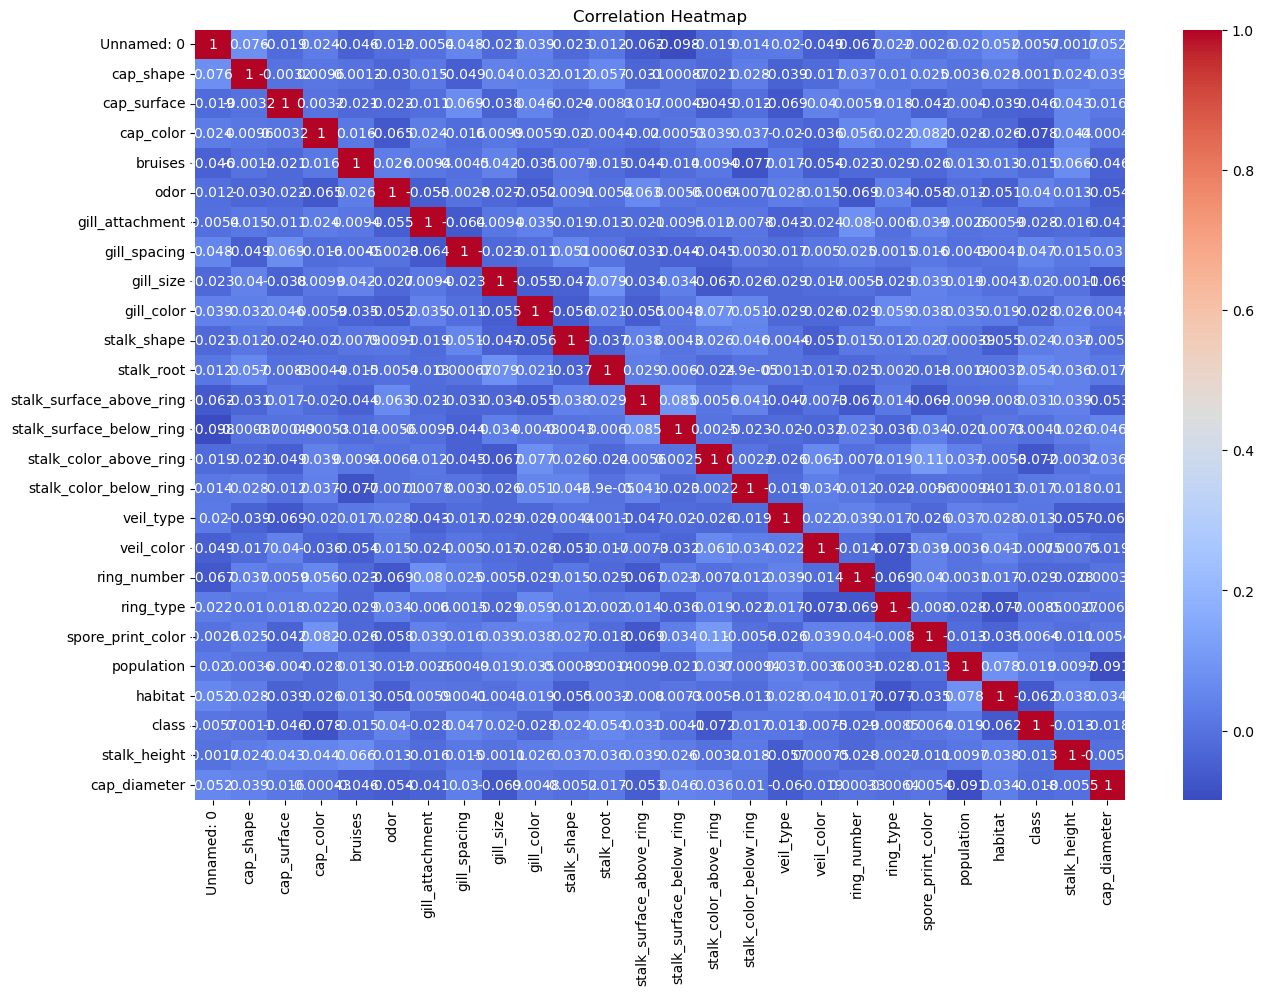

In [6]:
# Import Libraries
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

# Create a copy of the dataset to avoid modifying the original data
mushroom_data_encoded = mushroom_data.copy()

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode each feature in the dataset
for column in mushroom_data_encoded.columns:
    mushroom_data_encoded[column] = label_encoder.fit_transform(mushroom_data_encoded[column])

# Generate a correlation heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(mushroom_data_encoded.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Task 2: Data Preprocessing

# 2.1 Encoding Categorical Variables

In [7]:
# Since the mushroom dataset consists entirely of categorical features, we will apply Label Encoding
# Import Libraries
from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
label_encoder = LabelEncoder()

# Apply label encoding to each column in the dataset
for column in mushroom_data.columns:
    mushroom_data[column] = label_encoder.fit_transform(mushroom_data[column])

# Display the first few rows to confirm encoding
print("Encoded dataset:")
print(mushroom_data.head())

Encoded dataset:
   Unnamed: 0  cap_shape  cap_surface  cap_color  bruises  odor  \
0         889          4            2          7        0     1   
1         786          4            0          6        0     1   
2         246          3            1          5        1     4   
3         221          0            2          4        1     3   
4         630          3            3          8        1     5   

   gill_attachment  gill_spacing  gill_size  gill_color  ...  veil_type  \
0                1             2          0           7  ...          0   
1                3             1          1           3  ...          1   
2                1             1          0           8  ...          1   
3                3             0          0           6  ...          0   
4                2             1          1           6  ...          1   

   veil_color  ring_number  ring_type  spore_print_color  population  habitat  \
0           0            2          6           

# 2.2 Splitting the Dataset into Training and Testing Sets

In [8]:
# Import Libraries
from sklearn.model_selection import train_test_split

# Define the target variable 'class' and the features (all other columns)
X = mushroom_data.drop('class', axis=1)  # Features
y = mushroom_data['class']  # Target

# Split the data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shape of the training and testing sets
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (1600, 25)
Testing set shape: (400, 25)


# Task 3: Data Visualization

# 3.1 Visualize Feature Distributions and Relationships

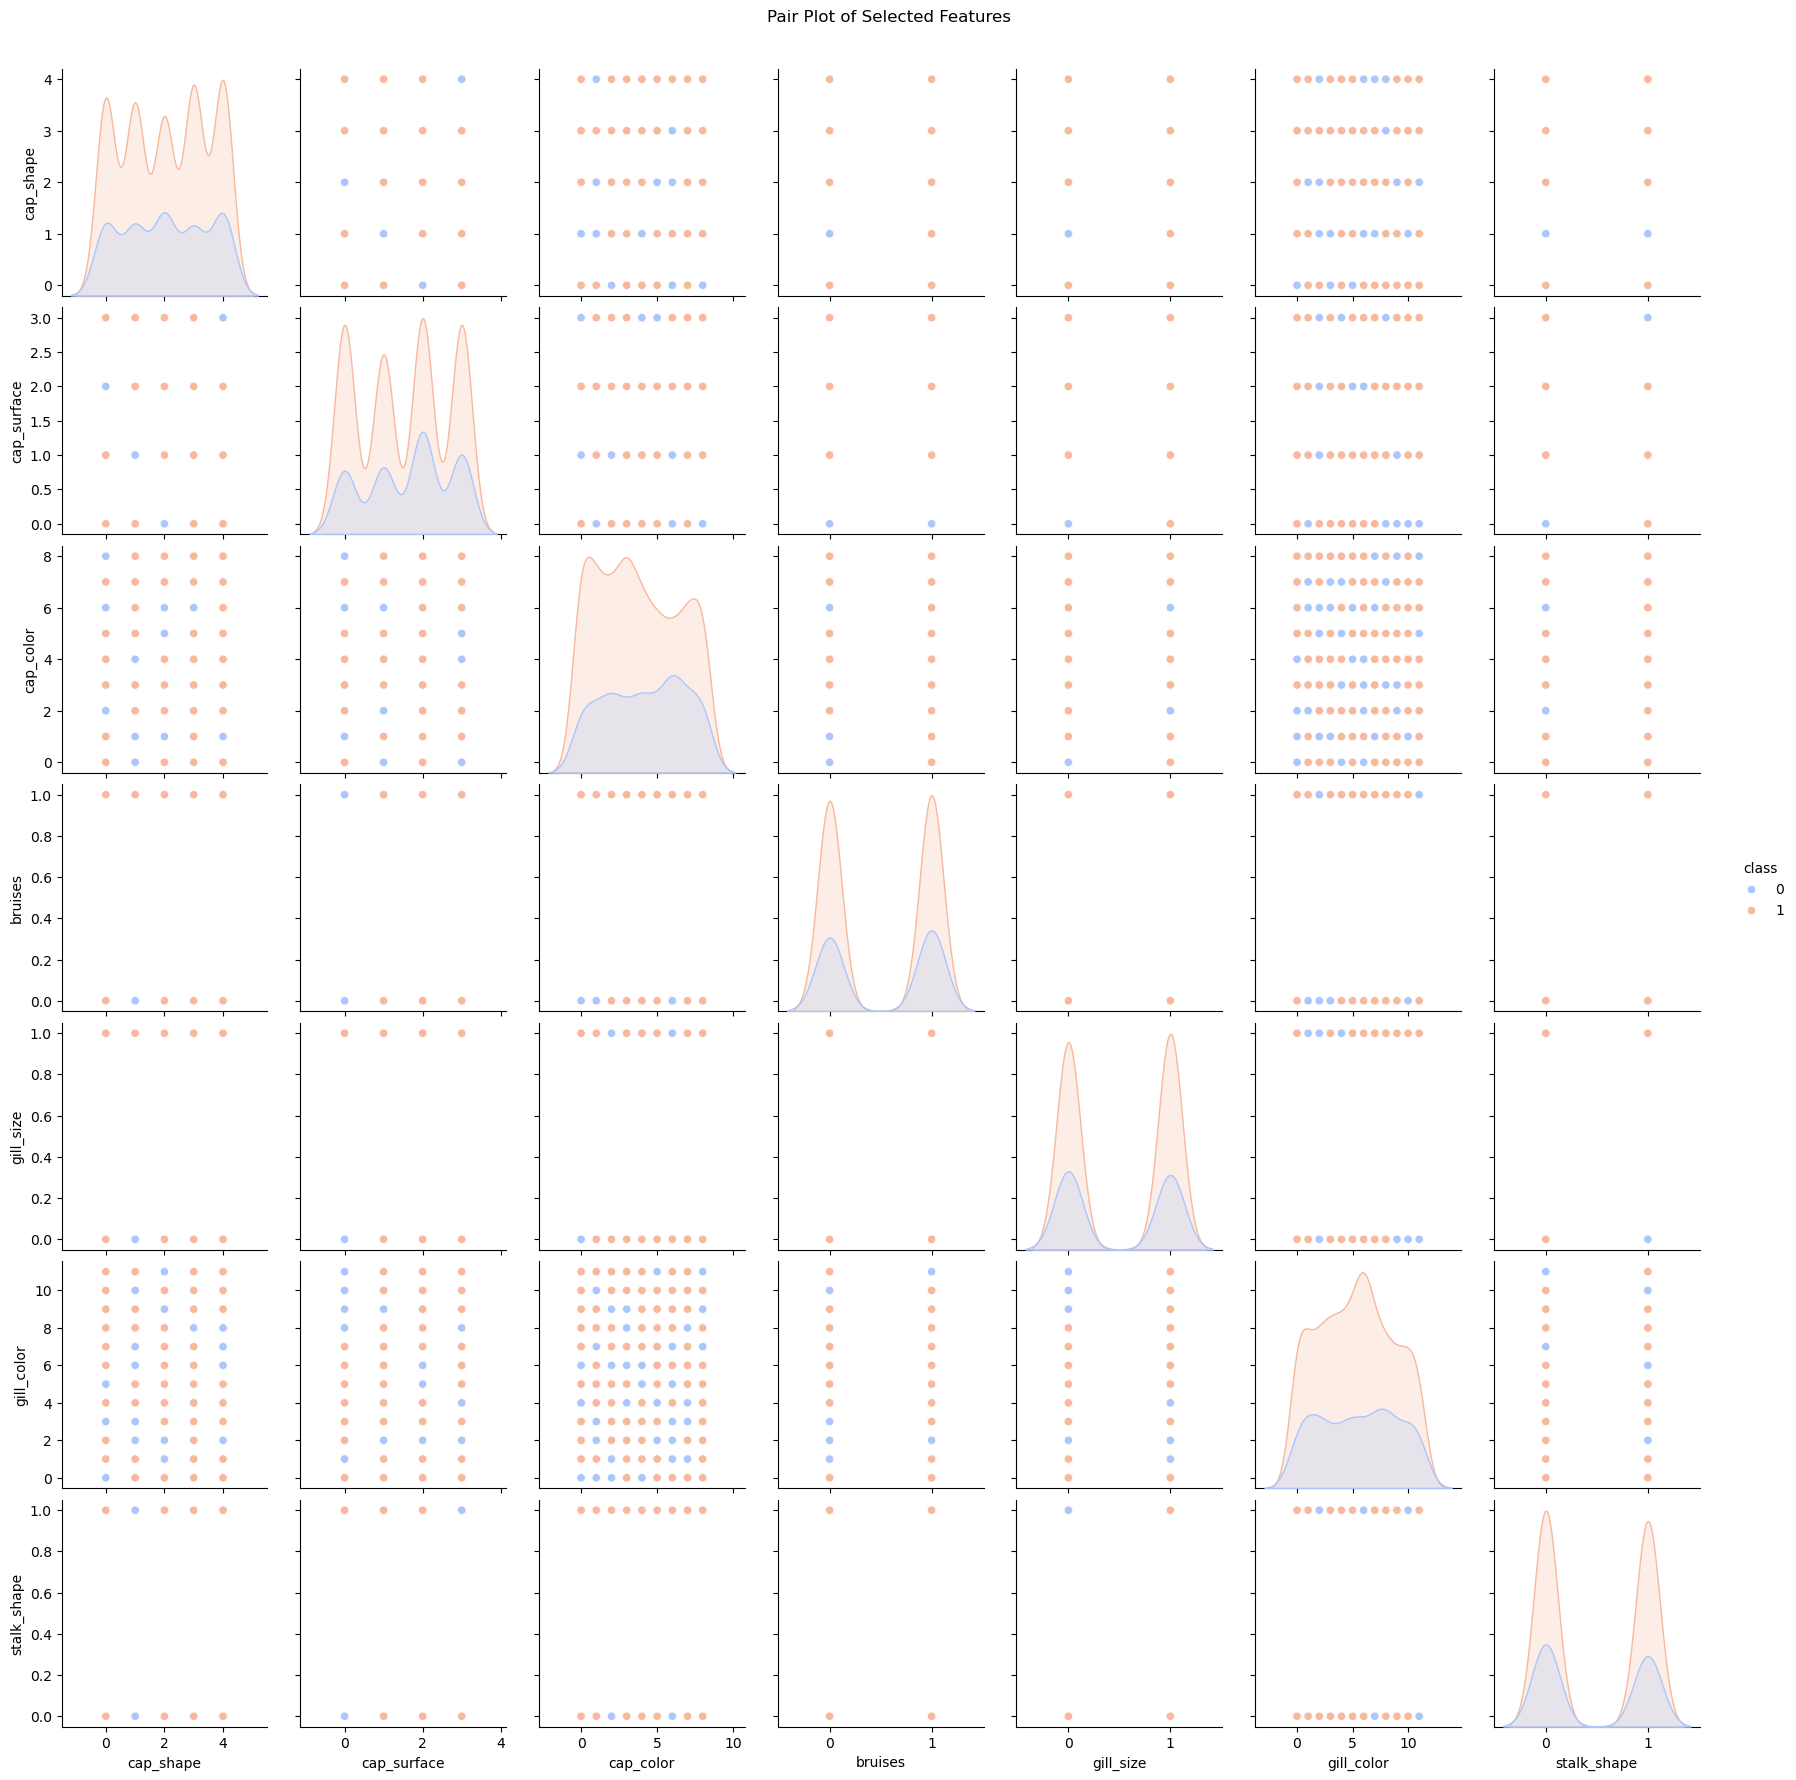

In [9]:
# Import Libraries
import seaborn as sns
import matplotlib.pyplot as plt

# For the sake of readability, let's pick a subset of features
# If needed, you can plot all features, but this will be more interpretable
subset_features = ['cap_shape', 'cap_surface', 'cap_color', 'bruises', 'gill_size', 'gill_color', 'stalk_shape']

# Create a pair plot with a hue based on the class (edible vs poisonous)
sns.pairplot(mushroom_data[subset_features + ['class']], hue='class', palette='coolwarm')
plt.suptitle('Pair Plot of Selected Features', y=1.02)
plt.show()

# 3.2 Visualize Class Distributions

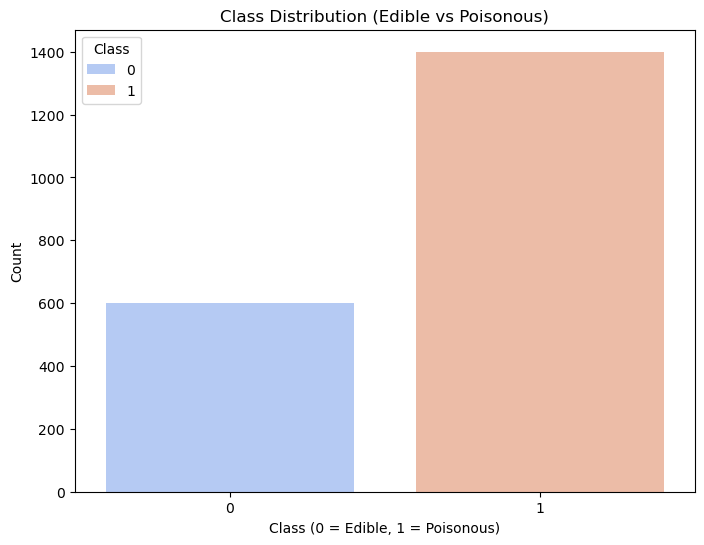

In [10]:
# Count plot for the class distribution with hue to assign colors
plt.figure(figsize=(8, 6))
sns.countplot(x='class', data=mushroom_data, hue='class', palette='coolwarm')
plt.title('Class Distribution (Edible vs Poisonous)')
plt.xlabel('Class (0 = Edible, 1 = Poisonous)')
plt.ylabel('Count')
plt.legend(title="Class")
plt.show()

# Task 4: SVM Implementation

# 4.1 & 4.2  Implement a Basic SVM Classifier & Train the SVM Model

In [11]:
# Import Libraries
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Initialize the SVM classifier with a default linear kernel
svm_classifier = SVC(kernel='linear')

# Train the SVM model on the training data
svm_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svm_classifier.predict(X_test)

# Display the first few predictions
print("First few predictions:", y_pred[:10])

First few predictions: [1 1 1 1 1 1 1 1 1 1]


# 4.2 Evaluate Model Performance

In [12]:
# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Calculate precision, recall, and F1-score
# We set the zero_division parameter to handle cases with no predicted samples for certain labels
precision = precision_score(y_test, y_pred, zero_division=1)
recall = recall_score(y_test, y_pred, zero_division=1)
f1 = f1_score(y_test, y_pred, zero_division=1)

# Print precision, recall, and F1-score
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Print a full classification report with zero_division parameter set to 1
print("\nClassification Report:")
print(classification_report(y_test, y_pred, zero_division=1))

Accuracy: 0.6675
Precision: 0.6675
Recall: 1.0000
F1 Score: 0.8006

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.00      0.00       133
           1       0.67      1.00      0.80       267

    accuracy                           0.67       400
   macro avg       0.83      0.50      0.40       400
weighted avg       0.78      0.67      0.53       400



# Task 5: Visualization of SVM Results

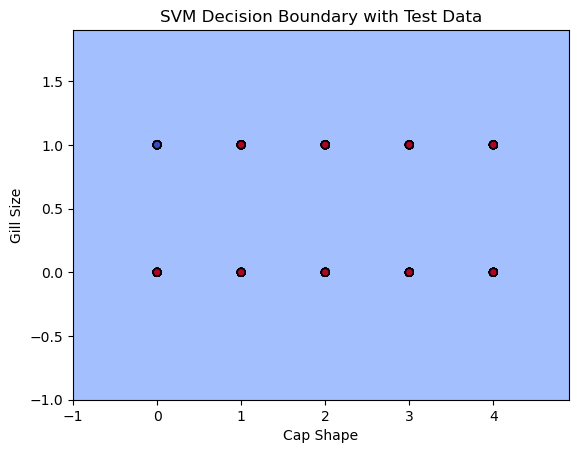

In [13]:
# Import necessary libraries for visualization
import matplotlib.pyplot as plt
import numpy as np

# Select two features for visualization purposes
# For example, let's use 'cap_shape' and 'gill_size' as our two features
X_train_2D = X_train[['cap_shape', 'gill_size']]
X_test_2D = X_test[['cap_shape', 'gill_size']]

# Train a new SVM classifier using only the two selected features for visualization
svm_classifier_2D = SVC(kernel='linear')
svm_classifier_2D.fit(X_train_2D, y_train)

# Create a mesh grid for plotting decision boundaries
x_min, x_max = X_test_2D.iloc[:, 0].min() - 1, X_test_2D.iloc[:, 0].max() + 1
y_min, y_max = X_test_2D.iloc[:, 1].min() - 1, X_test_2D.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Create a DataFrame with valid feature names for prediction
grid_points = pd.DataFrame(np.c_[xx.ravel(), yy.ravel()], columns=['cap_shape', 'gill_size'])

# Predict class labels for each point in the mesh grid using the DataFrame
Z = svm_classifier_2D.predict(grid_points)
Z = Z.reshape(xx.shape)

# Plot the decision boundary and the test points
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)

# Plot the test points with color based on true labels
plt.scatter(X_test_2D.iloc[:, 0], X_test_2D.iloc[:, 1], c=y_test, s=30, edgecolors='k', cmap=plt.cm.coolwarm)

# Add labels and title to the plot
plt.title("SVM Decision Boundary with Test Data")
plt.xlabel("Cap Shape")
plt.ylabel("Gill Size")

plt.show()

# Task 6: Parameter Tuning and Optimization

# 6.1 Load and Preprocess the Dataset (Including Train-Test Split)

In [14]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load the Mushroom dataset
mushroom_data = pd.read_csv('mushroom.csv')

# Encode categorical variables
label_encoder = LabelEncoder()
for column in mushroom_data.columns:
    mushroom_data[column] = label_encoder.fit_transform(mushroom_data[column])

# Define features and target
X = mushroom_data.drop('class', axis=1)
y = mushroom_data['class']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the split
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (1600, 25)
Testing set shape: (400, 25)


# 6.2 Perform Hyperparameter Tuning Using RandomizedSearchCV

In [15]:
# Import necessary libraries
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV

# Define a smaller parameter grid to reduce the search space
param_grid = {
    'C': [0.1, 1],           # Reduced number of values for C
    'gamma': [0.1],          # Single value for gamma
    'kernel': ['linear', 'rbf']  # Only linear and rbf kernels
}

# Initialize the SVM classifier with class weight balancing
svm = SVC(class_weight='balanced')

# Set up RandomizedSearchCV with 2-fold cross-validation to reduce run time
random_search = RandomizedSearchCV(svm, param_distributions=param_grid, n_iter=4, cv=2, verbose=2, random_state=42)

# Fit the random search to the training data
random_search.fit(X_train, y_train)

# Display the best parameters and best score
print("Best Parameters found:", random_search.best_params_)
print("Best Cross-Validation Score:", random_search.best_score_)

Fitting 2 folds for each of 4 candidates, totalling 8 fits
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=  21.1s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=  12.6s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.2s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.3s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time= 2.8min
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time= 3.6min
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.2s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.2s
Best Parameters found: {'kernel': 'rbf', 'gamma': 0.1, 'C': 1}
Best Cross-Validation Score: 0.8131250000000001


# 6.3 Evaluate the Best Model

In [16]:
# Use the best estimator from the random search to make predictions
best_model = random_search.best_estimator_
y_pred_best = best_model.predict(X_test)

# Import metrics for evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Calculate and print evaluation metrics
accuracy_best = accuracy_score(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best, zero_division=1)
recall_best = recall_score(y_test, y_pred_best, zero_division=1)
f1_best = f1_score(y_test, y_pred_best, zero_division=1)

print(f"Best Model Accuracy: {accuracy_best:.4f}")
print(f"Best Model Precision: {precision_best:.4f}")
print(f"Best Model Recall: {recall_best:.4f}")
print(f"Best Model F1 Score: {f1_best:.4f}")

# Print a detailed classification report
print("\nClassification Report for the Best Model:")
print(classification_report(y_test, y_pred_best, zero_division=1))

Best Model Accuracy: 0.8850
Best Model Precision: 0.8530
Best Model Recall: 1.0000
Best Model F1 Score: 0.9207

Classification Report for the Best Model:
              precision    recall  f1-score   support

           0       1.00      0.65      0.79       133
           1       0.85      1.00      0.92       267

    accuracy                           0.89       400
   macro avg       0.93      0.83      0.86       400
weighted avg       0.90      0.89      0.88       400



# Task 7: Comparison and Analysis

# 7.1 Compare SVM Performance with Different Kernels

# Load Dataset:

In [1]:
# Import Libraries
import pandas as pd

# Load the mushroom dataset
mushroom_data = pd.read_csv('mushroom.csv') 
mushroom_data = mushroom_data.drop(columns=['Unnamed: 0'])

# Display the first few rows to understand the structure of the dataset
mushroom_data.head()

cap_shape cap_surface cap_color bruises   odor gill_attachment gill_spacing  \
0    sunken       scaly     white      no  anise      descending      distant   
1    sunken     fibrous       red      no  anise         notched      crowded   
2      flat     grooves    purple     yes   foul      descending      crowded   
3      bell       scaly      pink     yes  fishy         notched        close   
4      flat      smooth    yellow     yes  musty            free      crowded   

  gill_size gill_color stalk_shape  ...  veil_type veil_color ring_number  \
0     broad       pink    tapering  ...    partial      brown         two   
1    narrow  chocolate   enlarging  ...  universal      brown         two   
2     broad     purple    tapering  ...  universal     yellow         two   
3     broad     orange   enlarging  ...    partial     yellow         two   
4    narrow     orange   enlarging  ...  universal      white        none   

   ring_type spore_print_color population  habitat      class stalk_height  \
0  sheathing         chocolate  clustered    waste  poisonous    14.276173   
1  sheathing             brown   numerous    waste     edible     3.952715   
2  sheathing            purple   abundant    waste  poisonous     9.054265   
3   cobwebby             green  clustered  grasses  poisonous     5.226499   
4       none            yellow  clustered    urban  poisonous    14.037532   

  cap_diameter  
0     5.054983  
1    19.068319  
2     7.205884  
3    20.932692  
4    12.545245  

[5 rows x 25 columns]

# Preprocess the Data:

In [4]:
# Separating features and target label
X = mushroom_data.drop(columns=['class'])
y = mushroom_data['class']

# Display first few rows of features and target
print("Features (X):")
print(X.head())  # Display the first few rows of the features

print("\nTarget (y):")
print(y.head())  # Display the first few rows of the target label

Features (X):
  cap_shape cap_surface cap_color bruises   odor gill_attachment gill_spacing  \
0    sunken       scaly     white      no  anise      descending      distant   
1    sunken     fibrous       red      no  anise         notched      crowded   
2      flat     grooves    purple     yes   foul      descending      crowded   
3      bell       scaly      pink     yes  fishy         notched        close   
4      flat      smooth    yellow     yes  musty            free      crowded   

  gill_size gill_color stalk_shape  ... stalk_color_below_ring  veil_type  \
0     broad       pink    tapering  ...                 yellow    partial   
1    narrow  chocolate   enlarging  ...                  brown  universal   
2     broad     purple    tapering  ...                   gray  universal   
3     broad     orange   enlarging  ...                   pink    partial   
4    narrow     orange   enlarging  ...                  white  universal   

  veil_color ring_number  ring_type 

# Label Encoding for Categorical Features:

In [5]:
# Import Libraries
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to all features
for column in X.columns:
    X[column] = label_encoder.fit_transform(X[column])

# Encode the target variable 'class'
y = label_encoder.fit_transform(y)  # Poisonous = 0, Edible = 1

# Display the encoded features and target for confirmation
print("Encoded Features (X):")
print(X.head())

print("\nEncoded Target (y):")
print(y[:5])  # Display first 5 encoded target labels

Encoded Features (X):
   cap_shape  cap_surface  cap_color  bruises  odor  gill_attachment  \
0          4            2          7        0     1                1   
1          4            0          6        0     1                3   
2          3            1          5        1     4                1   
3          0            2          4        1     3                3   
4          3            3          8        1     5                2   

   gill_spacing  gill_size  gill_color  stalk_shape  ...  \
0             2          0           7            1  ...   
1             1          1           3            0  ...   
2             1          0           8            1  ...   
3             0          0           6            0  ...   
4             1          1           6            0  ...   

   stalk_color_below_ring  veil_type  veil_color  ring_number  ring_type  \
0                       8          0           0            2          6   
1                       0       

# Split the Data into Training and Test Sets:

In [6]:
# Import Libraries
from sklearn.model_selection import train_test_split

# Splitting data into training and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shape of the training and test sets
print("Training Set Shape (X_train, y_train):", X_train.shape, y_train.shape)
print("Test Set Shape (X_test, y_test):", X_test.shape, y_test.shape)

Training Set Shape (X_train, y_train): (1600, 24) (1600,)
Test Set Shape (X_test, y_test): (400, 24) (400,)


# Train SVM with a Linear Kernel:

In [8]:
# SVM with Linear Kernel
# Import Libraries
from sklearn.svm import SVC
from sklearn.metrics import classification_report

linear_svm = SVC(kernel='linear', random_state=42)
linear_svm.fit(X_train, y_train)

# Make predictions on the test set
y_pred_linear = linear_svm.predict(X_test)

# Display the classification report without warnings
print("Linear Kernel Performance:\n")
print(classification_report(y_test, y_pred_linear, zero_division=1))

Linear Kernel Performance:

              precision    recall  f1-score   support

           0       1.00      0.00      0.00       133
           1       0.67      1.00      0.80       267

    accuracy                           0.67       400
   macro avg       0.83      0.50      0.40       400
weighted avg       0.78      0.67      0.53       400



# Train SVM with a Polynomial Kernel:

In [9]:
# SVM with Polynomial Kernel
poly_svm = SVC(kernel='poly', degree=3, random_state=42)
poly_svm.fit(X_train, y_train)

# Make predictions on the test set
y_pred_poly = poly_svm.predict(X_test)

# Display the classification report without warnings
print("Polynomial Kernel Performance:\n")
print(classification_report(y_test, y_pred_poly, zero_division=1))

Polynomial Kernel Performance:

              precision    recall  f1-score   support

           0       1.00      0.00      0.00       133
           1       0.67      1.00      0.80       267

    accuracy                           0.67       400
   macro avg       0.83      0.50      0.40       400
weighted avg       0.78      0.67      0.53       400



# Train SVM with an RBF Kernel:

In [10]:
# SVM with RBF Kernel
rbf_svm = SVC(kernel='rbf', random_state=42)
rbf_svm.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rbf = rbf_svm.predict(X_test)

# Display the classification report without warnings
print("RBF Kernel Performance:\n")
print(classification_report(y_test, y_pred_rbf, zero_division=1))

RBF Kernel Performance:

              precision    recall  f1-score   support

           0       1.00      0.00      0.00       133
           1       0.67      1.00      0.80       267

    accuracy                           0.67       400
   macro avg       0.83      0.50      0.40       400
weighted avg       0.78      0.67      0.53       400



# Comparison:

In [11]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Load the dataset
mushroom_data = pd.read_csv('mushroom.csv')

# Drop unnecessary columns
mushroom_data = mushroom_data.drop(columns=['Unnamed: 0'])

# Separate features and target
X = mushroom_data.drop(columns=['class'])
y = mushroom_data['class']

# Encode categorical variables
label_encoder = LabelEncoder()
for column in X.columns:
    X[column] = label_encoder.fit_transform(X[column])
y = label_encoder.fit_transform(y)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# SVM with Linear Kernel
linear_svm = SVC(kernel='linear', random_state=42)
linear_svm.fit(X_train, y_train)
y_pred_linear = linear_svm.predict(X_test)
linear_report = classification_report(y_test, y_pred_linear, zero_division=1)

# SVM with Polynomial Kernel
poly_svm = SVC(kernel='poly', degree=3, random_state=42)
poly_svm.fit(X_train, y_train)
y_pred_poly = poly_svm.predict(X_test)
poly_report = classification_report(y_test, y_pred_poly, zero_division=1)

# SVM with RBF Kernel
rbf_svm = SVC(kernel='rbf', random_state=42)
rbf_svm.fit(X_train, y_train)
y_pred_rbf = rbf_svm.predict(X_test)
rbf_report = classification_report(y_test, y_pred_rbf, zero_division=1)

# Dictionary to store kernel names and their respective classification reports
svm_reports = {
    "Linear Kernel": linear_report,
    "Polynomial Kernel": poly_report,
    "RBF Kernel": rbf_report
}

# Loop through the dictionary and print each result
for kernel, report in svm_reports.items():
    print(f"=== SVM with {kernel} ===")
    print(report)
    print("\n" + "="*40 + "\n")

=== SVM with Linear Kernel ===
              precision    recall  f1-score   support

           0       1.00      0.00      0.00       133
           1       0.67      1.00      0.80       267

    accuracy                           0.67       400
   macro avg       0.83      0.50      0.40       400
weighted avg       0.78      0.67      0.53       400



=== SVM with Polynomial Kernel ===
              precision    recall  f1-score   support

           0       1.00      0.00      0.00       133
           1       0.67      1.00      0.80       267

    accuracy                           0.67       400
   macro avg       0.83      0.50      0.40       400
weighted avg       0.78      0.67      0.53       400



=== SVM with RBF Kernel ===
              precision    recall  f1-score   support

           0       1.00      0.00      0.00       133
           1       0.67      1.00      0.80       267

    accuracy                           0.67       400
   macro avg       0.83      0

# 7.2 Analyzed Strengths & Weakness

# Strengths of SVM on the Mushroom Dataset

### 1. Effective for Binary Classification:
- **SVM** is inherently strong for binary classification tasks, such as this one, where the goal is to classify mushrooms as either edible (1) or poisonous (0).
- The model performs well for the majority class (edible mushrooms), achieving high recall in all three kernel models (Linear, Polynomial, RBF).

### 2. Kernel Flexibility:
- **SVM** allows for different kernels (Linear, Polynomial, RBF), making it adaptable to both linear and non-linear relationships between features and the target variable.
- Although the performance across different kernels was similar, this flexibility in choosing kernels makes SVM applicable to many datasets.

### 3. Strong Generalization in High-Dimensional Data:
- **SVM** performs well in high-dimensional spaces, and while the Mushroom dataset has a moderate number of features, SVM can handle much higher dimensionality without significant loss of performance.
- This generalization ability makes **SVM** suitable for datasets with many features.

### 4. Handling Non-Linearity:
- The **Polynomial** and **RBF kernels** can theoretically capture complex, non-linear relationships between features.
- This flexibility is important for datasets with intricate patterns, though it was not heavily utilized in this specific Mushroom dataset due to its categorical nature.

---

# Weaknesses of SVM on the Mushroom Dataset

### 1. Class Imbalance Handling:
- **Class imbalance** is a critical weakness. In the Mushroom dataset, the majority class (edible mushrooms) significantly outnumbers the minority class (poisonous mushrooms).
- The **SVM** models failed to correctly classify any poisonous mushrooms, as seen from the **0% recall for the poisonous class** in all three kernels. This makes the model ineffective for scenarios where identifying the minority class is crucial.

### 2. Weak Performance on Categorical Data:
- **SVM** models generally perform better on **continuous numerical data**. In this case, all features in the Mushroom dataset are categorical, which were converted into numerical values through encoding.
- This conversion may have caused the model to lose important relationships between categorical levels, leading to **suboptimal performance**. **SVM** might not fully capture the relationships among categorical features compared to models that natively handle categorical data (e.g., Decision Trees or Random Forests).

### 3. No Improvement from Non-Linear Kernels:
- Despite using more complex kernels like **Polynomial** and **RBF**, the performance of these models did not improve significantly over the **Linear Kernel**.
- This indicates that the underlying relationships in the Mushroom dataset were likely **linear** or that the encoded categorical data did not benefit from the non-linear transformation offered by **Polynomial** or **RBF** kernels.

### 4. Computational Complexity:
- **Non-linear kernels** such as **Polynomial** and **RBF** require more computational power and time to train, especially on larger datasets.
- In this case, the added complexity of these kernels did not yield better results, meaning the **extra computational cost** was not justified.


# 7.3 Discuss Practical Implications of SVM in Real-World Classification Tasks

### Practical Implications of SVM in Real-World Classification Tasks

**Advantages**:
- SVM provides high accuracy for binary classification tasks and works well in domains like medical diagnosis and text classification.
- The ability to use non-linear kernels (e.g., RBF) allows SVM to handle more complex data.

**Challenges**:
- SVM struggles with imbalanced data, as seen in fraud detection or rare event prediction tasks. This can be addressed using techniques like **class weighting**.
- SVM is computationally expensive for large datasets, especially with non-linear kernels.
- Handling categorical data is difficult, and extensive preprocessing is required.


<center>
    <h1 style="font-family: 'Cursive'; 
               font-size: 150px; 
               color: Yellow; 
               text-shadow: 0 0 10px #0000FF, 0 0 20px #0000FF, 0 0 30px #0000FF;">
        Thank You
    </h1>
</center>